In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - Importação das bibliotecas

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 2 - Importação dos Dados


In [3]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Machine Learning e Data Science com Python de A a Z/Estudo geral/credit_data.csv'
base = pd.read_csv(PATH)
base.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
base.columns

Index(['i#clientid', 'income', 'age', 'loan', 'c#default'], dtype='object')

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


# 3 - Dicionario de dados


1 - i#clientid: id do cliente (Variável numérica discreta);
 
2 - income: renda do cliente (Variável numérica contínua);
 
3 - age: idade do cliente (Variável numérica discreta);
 
4 - loan: empréstimo pedido pelo cliente (Variável numérica contínua);
 
5 - c#default: variável booleana para aceitar ou não o empréstimo (Variável booleana);


# 4 - Comportamento das variáveis

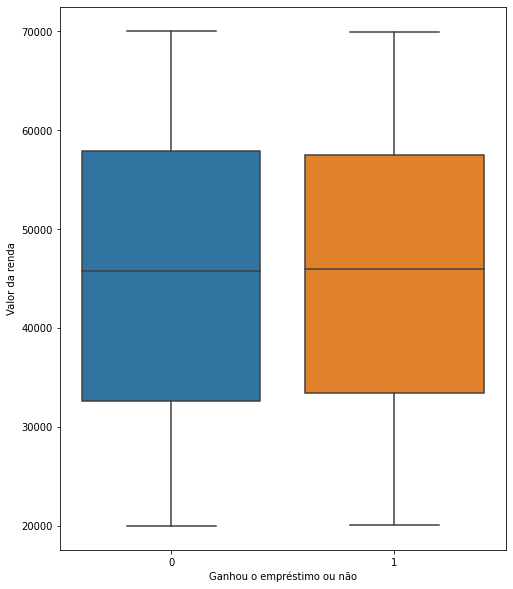

In [6]:
plt.figure(figsize=(8, 10))
sns.boxplot(y = "income", x = 'c#default', data=base)
plt.xlabel('Ganhou o empréstimo ou não')
plt.ylabel('Valor da renda')
plt.show()

- Os valores da renda dos clientes estão bem distribuídos tanto para aqueles que foram aceitos quanto aqueles que não ganharam o empréstimo. Isso nos mostra que difere o valor da renda para ganhar o empréstimo.

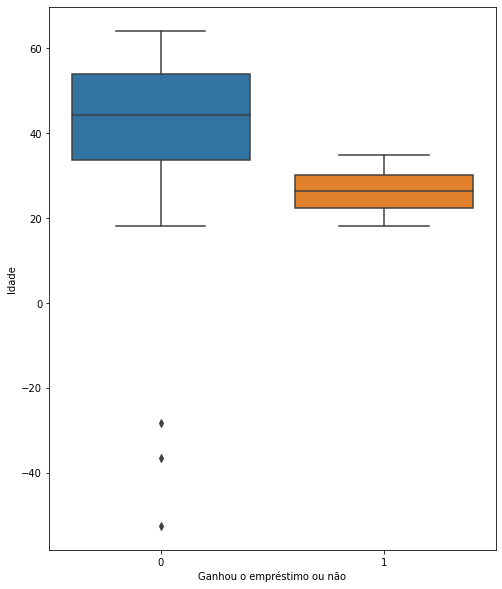

In [7]:
plt.figure(figsize=(8, 10))
sns.boxplot(y = "age", x='c#default' ,  data=base)
plt.xlabel('Ganhou o empréstimo ou não')
plt.ylabel('Idade')
plt.show()

- Notamos que possui dados que nao estao corretos que podem atrapalhar as análises e modelagens futuras. Mas podemos notar que a faixa de idade com empréstimo aceitos está entre 22 a 35 anos aproximadamente, sendo já um foco excelente para a aprovação do empréstimo.

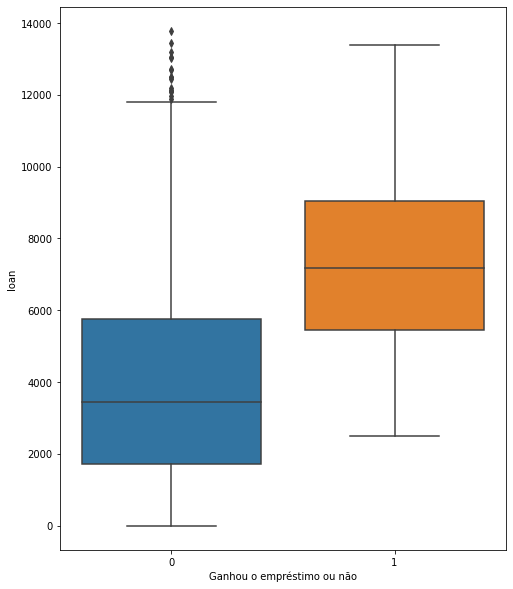

In [8]:
plt.figure(figsize=(8, 10))
sns.boxplot(y = "loan", x = 'c#default', data=base)
plt.xlabel('Ganhou o empréstimo ou não')
plt.show()

- Temos que os empréstimos aceitos têm valores maiores em relação aos empréstimos não aceitos. Isso pode ser explicado por causa do retorno mais lucrativo para a financiadora quando o valor emprestado for maior.

# 5 - Pré-Processamento de dados

In [9]:
base.describe()

,i#clientid,income,age,loan,c#default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [10]:
base[base['age'] > 0].describe()

,i#clientid,income,age,loan,c#default
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,1003.431795,45328.856915,40.927700,4443.240892,0.141926
std,575.879624,14326.777212,13.271802,3046.879619,0.349062
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,505.250000,32812.340050,29.043284,1934.218490,0.000000
50%,1003.500000,45785.950926,41.382673,3971.653442,0.000000
75%,1501.750000,57782.054534,52.616900,6438.044498,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


- Fazendo uma breve olhada para as descrições mostradas, já podemos notar que na na idade (age) possui uma idade bem discrepante (-52) gerando uma inconsistência dos dados.

In [11]:
base.loc[base['age'] < 0]

,i#clientid,income,age,loan,c#default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


- Encontrando os clientes da base que estão com a idade inconsistente e fazendo o tratamento com os registros problemáticos.

In [12]:
base.mean()

i#clientid     1000.500000
income        45331.600018
age              40.807559
loan           4444.369695
c#default         0.141500
dtype: float64

In [13]:
base['age'][base.age > 0].mean()

40.92770044906149

- Encontrando a média das idades desconsiderando os valores negativo como foi mostrado mais acima.

In [14]:
base.loc[base.age < 0, 'age'] = 40.927700
base.loc[base['age'] < 0]

,i#clientid,income,age,loan,c#default


- Agora não há mais valores inconsistentes para a idade.

In [15]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


- Analisando as informações das variáveis, podemos notar que para a idade (age) existem valores nulos (3 valores).

In [16]:
base.loc[pd.isnull(base['age'])]

,i#clientid,income,age,loan,c#default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


- Para fazer a correção dos dados faltantes, uma solução é a utilização do sklearn.impute com o SimpleImputer.

In [17]:
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

- Fazendo a divisão da base para prever os valores.

In [18]:
imputer = SimpleImputer(strategy = 'mean')
imputer = imputer.fit(previsores[:, 0:3])
previsores[:, 0:3] = imputer.transform(previsores[:, 0:3])
previsores[28:31]

array([[5.94178054e+04, 4.09277004e+01, 2.08262594e+03],
       [5.88428913e+04, 5.45109476e+01, 1.08711868e+04],
       [4.85288528e+04, 4.09277004e+01, 6.15578467e+03]])

- O resultado da utilização do SimpleImputer para consertar os dados faltantes na base.

## Escalonando os dados
Como os dados da renda em relação aos dados da idade são bem discrepantes, possivelmente, o modelo daria uma preferência maior para os valores que estão na renda do que em nos valores da idade.
 
Assim é necessário fazer o ajuste de escala para entre esses valores para que a predição aconteça com maior certeza em relação a algoritmos baseados em distância euclidiana (KNN).


Assim é possível utilizar dois métodos para fazer o escalonamento que são o da Padronização (Standardisation) e o Normalização (Normalization)
 
Padronização
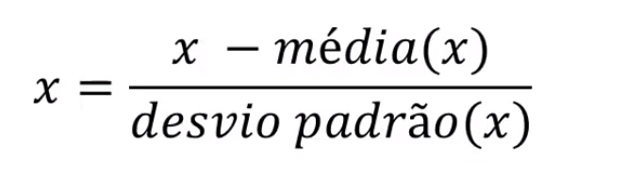





Normalização
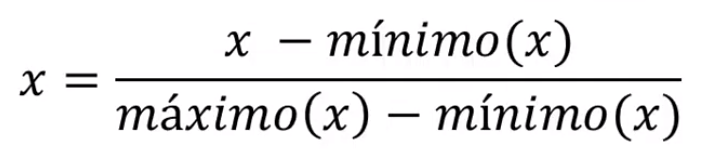

Assim, utilizando o sklearn para fazer os cálculos dos escalonamentos temos:

In [19]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
previsores

array([[ 1.45393393,  1.36538005,  1.20281942],
       [-0.76217555,  0.54265932,  0.69642695],
       [ 0.83682073,  1.67417101,  1.17471147],
       ...,
       [-0.07122592, -0.97448606,  0.35420081],
       [-0.11000289,  1.73936652, -0.92675625],
       [ 1.682986  ,  1.14917551,  0.96381038]])

- Agora com esse ajuste da escala, não existe a diferença relevante entre a renda e a idade.

# 6 - Divisão da base em treino e teste

## 6.1 - Fazendo a divisão dos previsores e das classes

In [20]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [21]:
previsores_treinamento.shape, previsores_teste.shape, classe_treinamento.shape, classe_teste.shape

((1500, 3), (500, 3), (1500,), (500,))

## 6.2 - Verificando o valor da linha base (Baseline)

In [22]:
collections.Counter(classe_teste)

Counter({0: 436, 1: 64})

- Podemos notar que a acurácia base em que os modelos serão considerados bons é de **87,2%**

# 7 - Criação do modelo

## 7.1 - Utilizando o modelo de Regressão Logística

### 7.1.1 - Criando a predição

In [23]:
modelo_logistica_regressao = LogisticRegression(random_state=1)
modelo_logistica_regressao.fit(previsores_treinamento, classe_treinamento)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predicoes = modelo_logistica_regressao.predict(previsores_teste)

### 7.1.2 - Resultado da predição

In [25]:
print(classification_report(classe_teste, predicoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



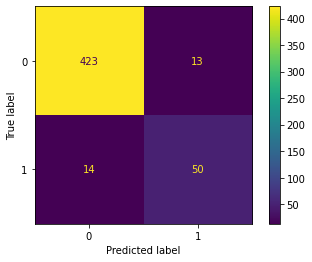

In [26]:
disp = plot_confusion_matrix(modelo_logistica_regressao, previsores_teste, classe_teste, values_format="d")
print(disp)
plt.show()

## 7.2 - Utilizando o modelo de Neive Bayes

### 7.2.1 - Criando a predição

In [27]:
classificador  = GaussianNB()

In [28]:
classificador.fit(previsores_treinamento, classe_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
previsoes_NB = classificador.predict(previsores_teste)

### 7.2.2 - Resultado da predição

In [30]:
print(classification_report(classe_teste, previsoes_NB))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



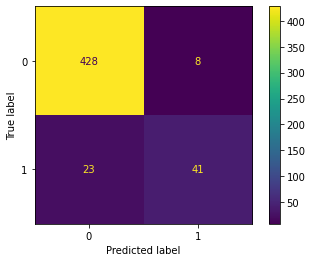

In [31]:
disp = plot_confusion_matrix(classificador, previsores_teste, classe_teste, values_format="d")
print(disp)
plt.show()

## 7.3 - Utilizando Árvore de Decisão

### 7.3.1 - Criando a predição

In [32]:
classificador_DT = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

In [33]:
classificador_DT.fit(previsores_treinamento, classe_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
previsoes_DT = classificador_DT.predict(previsores_teste)

### 7.3.2 - Resultados

In [35]:
print(classification_report(classe_teste, previsoes_DT))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



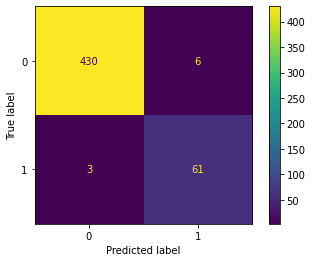

In [36]:
disp = plot_confusion_matrix(classificador_DT, previsores_teste, classe_teste, values_format="d")
print(disp)
plt.show()

## 7.4 - Utilizando Árvores Randomicas

### 7.4.1 - Criando a predição

In [37]:
classificador_RF = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0, )

In [38]:
classificador_RF.fit(previsores_treinamento, classe_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
previsao_RF = classificador_RF.predict(previsores_teste)

### 7.4.2 - Resultado da predição

In [40]:
print(classification_report(classe_teste, previsao_RF))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



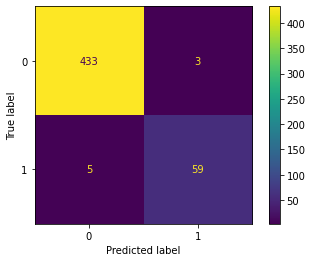

In [41]:
disp = plot_confusion_matrix(classificador_RF, previsores_teste, classe_teste, values_format="d")
print(disp)
plt.show()

## 7.5 - Utilizando KNN

### 7.5.1 - Criando a predição

In [42]:
classificador_KNN = KNeighborsClassifier()

In [43]:
classificador_KNN.fit(previsores_treinamento, classe_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
previsao_KNN = classificador_KNN.predict(previsores_teste)

### 7.5.2 - Resultados da predição

In [45]:
print(classification_report(classe_teste, previsao_KNN))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



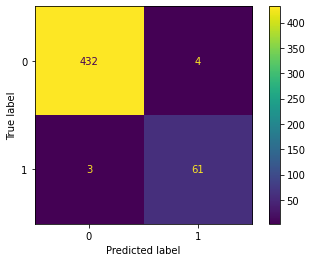

In [46]:
disp = plot_confusion_matrix(classificador_KNN, previsores_teste, classe_teste, values_format="d")
print(disp)
plt.show()

## 7.6 - Utilizando SVM

### 7.6.1 - Criando a predição

In [47]:
classificador_SVC = SVC(kernel='rbf', random_state=1, C=2.0)

In [48]:
classificador_SVC.fit(previsores_treinamento, classe_treinamento)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [49]:
previsao_SVC = classificador_SVC.predict(previsores_teste)

### 7.6.2 - Resultados da predição

In [50]:
print(classification_report(classe_teste, previsao_SVC))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



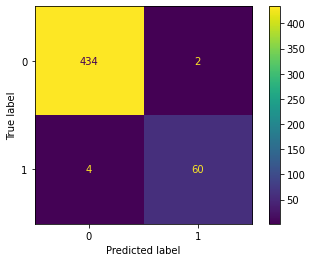

In [51]:
disp = plot_confusion_matrix(classificador_SVC, previsores_teste, classe_teste, values_format="d")
print(disp)
plt.show()